<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


1=Dog
0=Cat


In [2]:
#Downloading the dataset
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2021-12-10 09:20:57--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.122.44.55, 2600:1407:21:28d::e59, 2600:1407:21:2a0::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.122.44.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  28.8MB/s    in 24s     

2021-12-10 09:21:21 (32.6 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
!unzip kagglecatsanddogs_3367a.zip

Importing the modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [11]:
import os

**Creating a dataframe**

In [ ]:
input_path=[]
label=[]
for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name=="Cat":
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages",class_name,path))
    print(input_path[0],label[0])


In [21]:
len(input_path)


25002

In [22]:
input_path[0]

'PetImages/Dog/9240.jpg'

In [25]:
df=pd.DataFrame()
df['images']=input_path
df['label']=label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages/Dog/2923.jpg      1
1  PetImages/Dog/8494.jpg      1
2  PetImages/Dog/2617.jpg      1
3   PetImages/Cat/969.jpg      0
4  PetImages/Dog/8449.jpg      1

Delete db files


In [45]:
for i in df['images']:
  if '.jpg' not in i:
    print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [46]:
df=df[df['images']!='PetImages/Dog/Thumbs.db']
df=df[df['images']!='PetImages/Cat/Thumbs.db']

Exploratory Data Analysis


In [26]:
import random

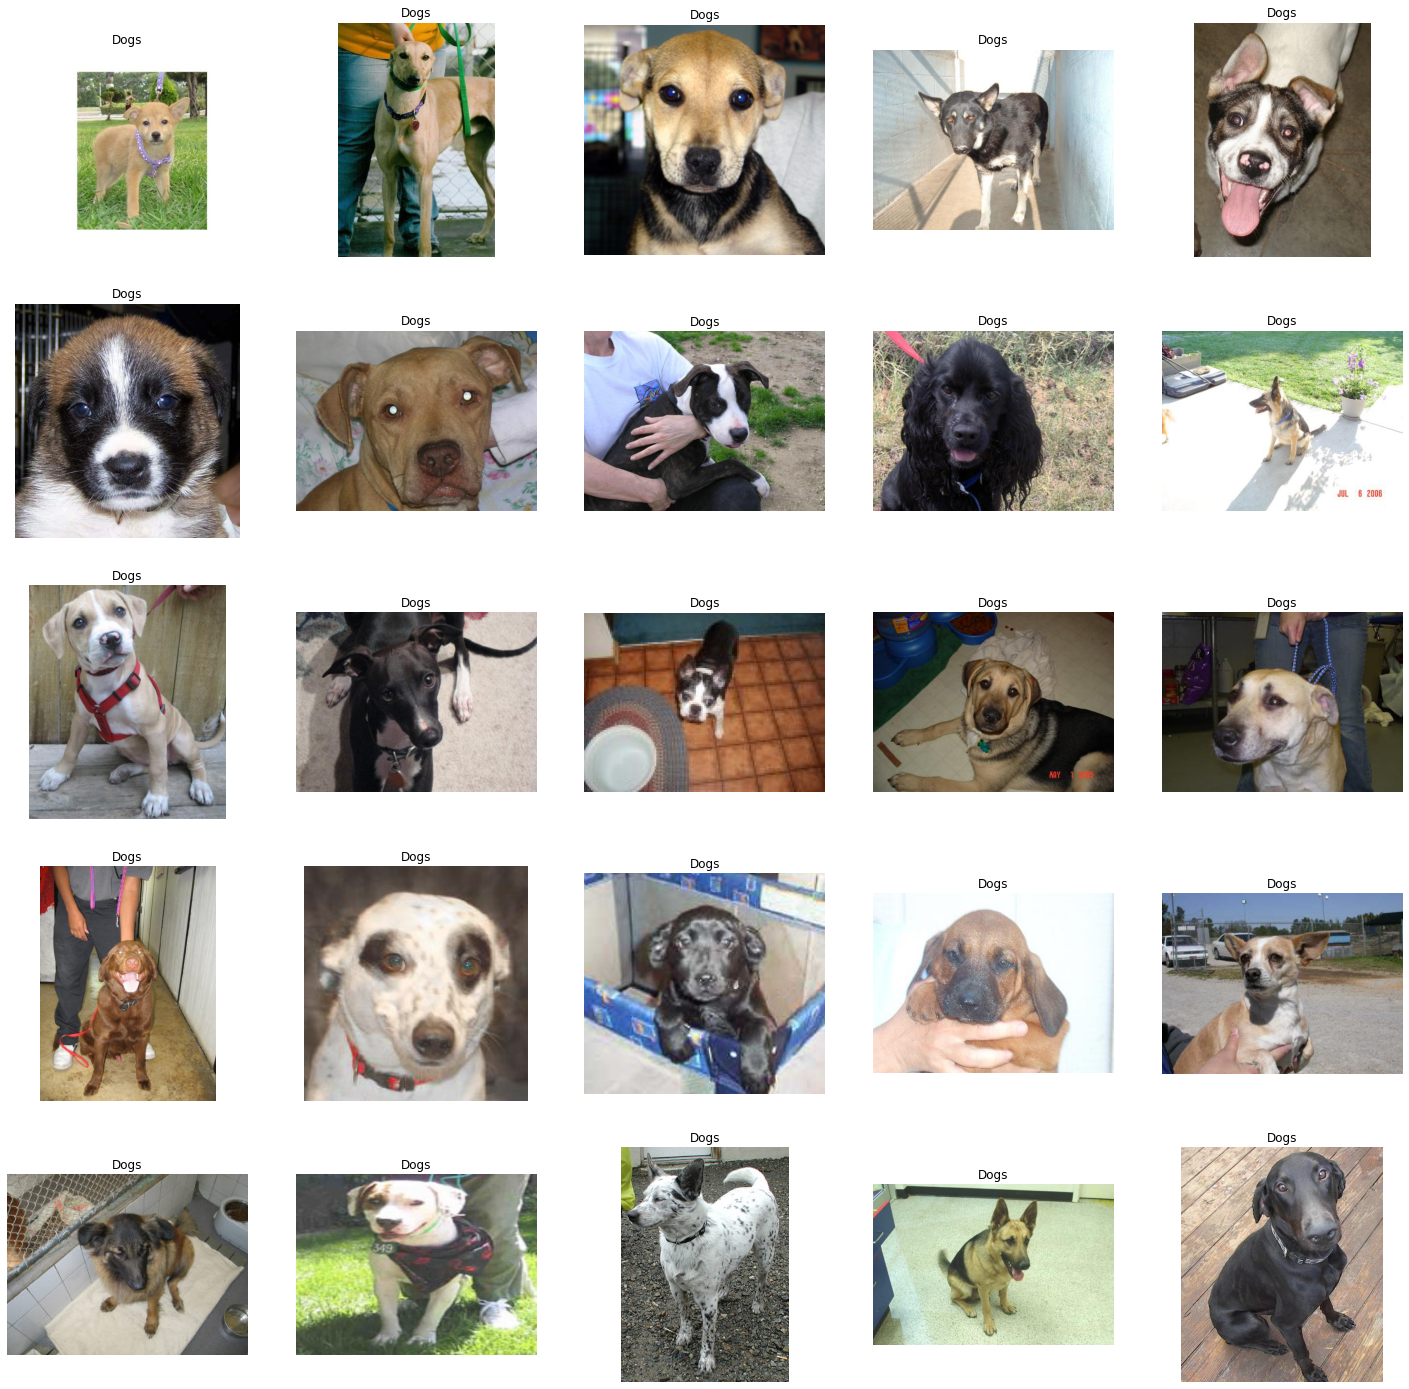

In [31]:
#to display grid of images
plt.figure(figsize=(25,25))
temp=df[df['label']==1]['images']
start=random.randint(0,len(temp))
files=temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
 
  plt.title('Dogs')
  plt.axis('off')



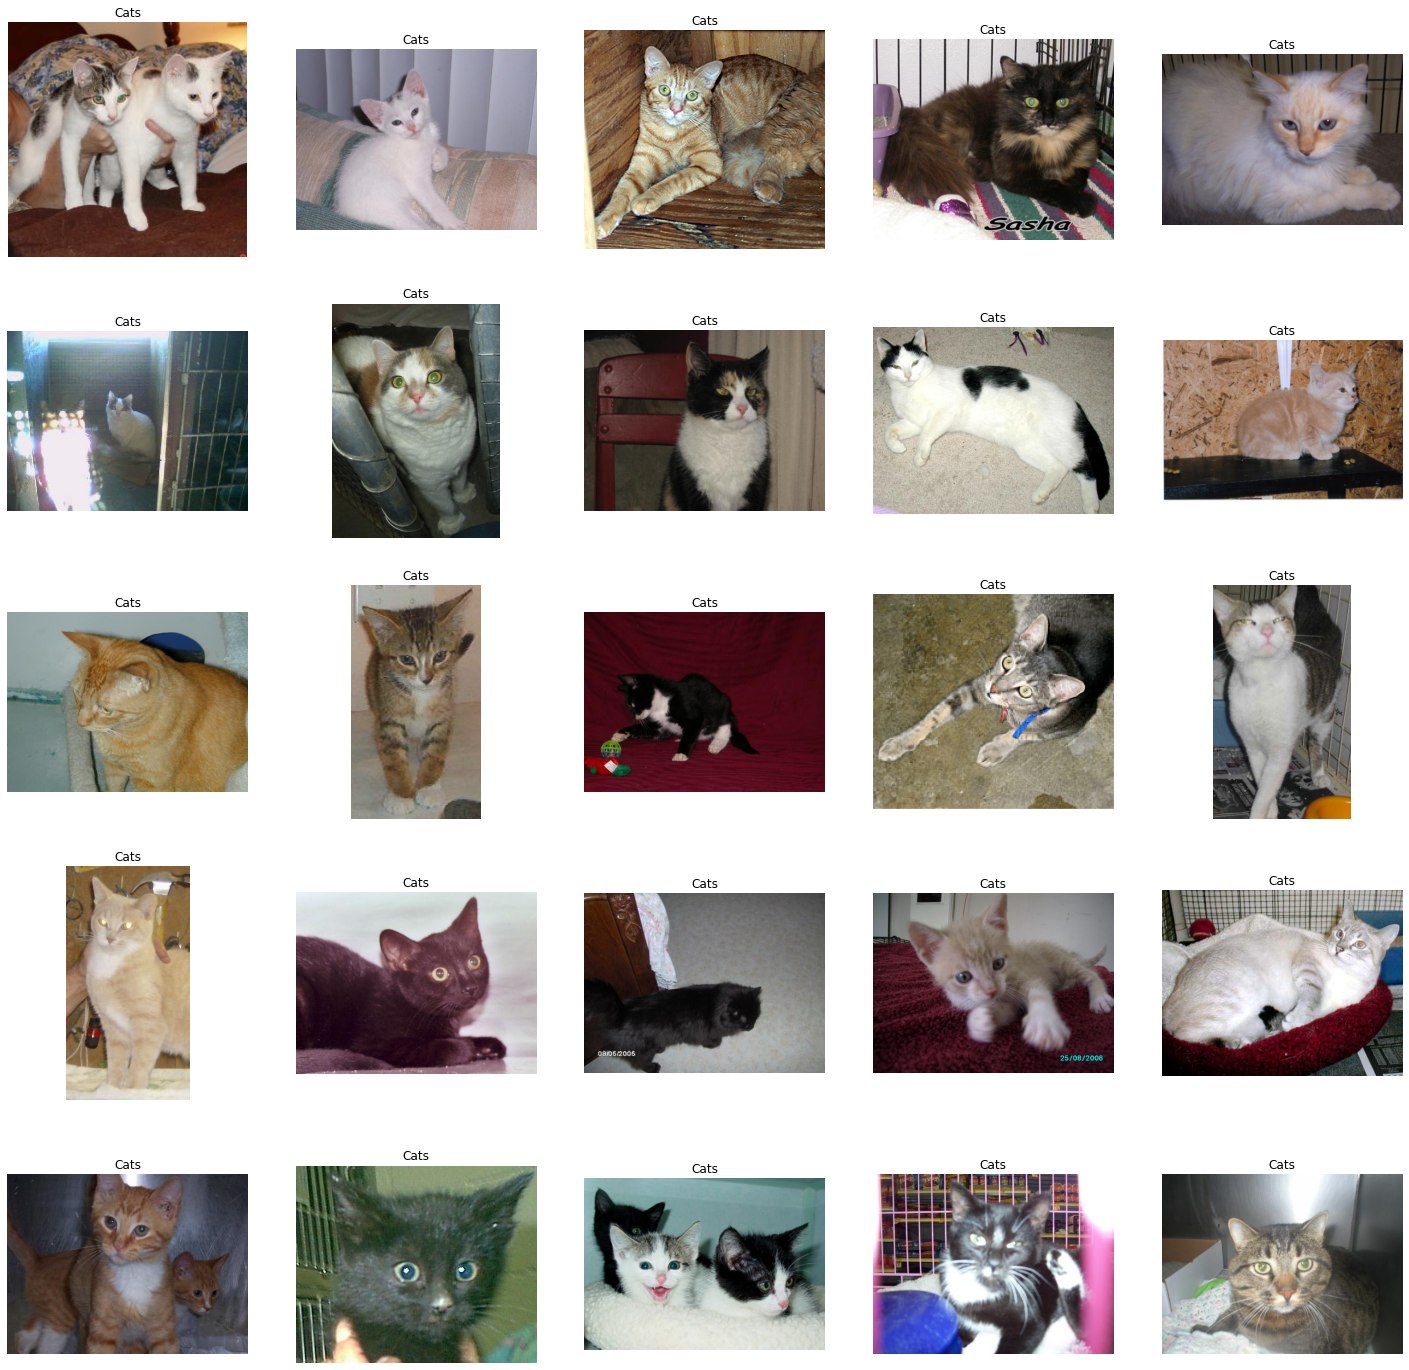

In [32]:
#to display grid of images
plt.figure(figsize=(25,25))
temp=df[df['label']==0]['images']
start=random.randint(0,len(temp))
files=temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
 
  plt.title('Cats')
  plt.axis('off')


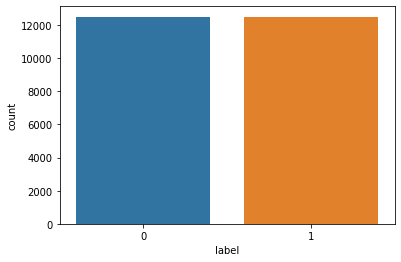

In [33]:
import seaborn as sns
sns.countplot(df['label'])

**Create DataGenerator for the Images**

In [36]:
df['label']=df['label'].astype('str')

In [58]:
from keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_iterator=train_generator.flow_from_dataframe(df,x_col='images',y_col='label',target_size=(128,128),batch_size=512,class_mode='binary')

Found 25000 validated image filenames belonging to 2 classes.


**Creating our Model**

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model=Sequential([
                  Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
                  MaxPool2D((2,2)),
                  Conv2D(32,(3,3),activation='relu'),
                  MaxPool2D((2,2)),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPool2D((2,2)),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dense(1,activation='sigmoid')
            



])


In [2]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

NameError: ignored

In [47]:
import PIL

In [61]:
l=[]
for image in df['images']:
  try:
     img=PIL.Image.open(image)
  except:
   l.append(image)


In [53]:
l


['PetImages/Dog/11702.jpg', 'PetImages/Cat/666.jpg']

In [54]:
#deleting
df=df[df['images']!='PetImages/Dog/666s.db']
df=df[df['images']!='PetImages/Cat/11702.db']

In [1]:
history=model.fit(train_iterator,epochs=10)

NameError: ignored